# Project: No-Show Appointment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>In this project, we would be investigating the No-Show Apointment dataset which consist of about 100k medical appointments in
Brazil and is focused on the question of whether or not patients show up for their appointment.
Details of the dataset:
<br>Consist of 14 columns and 110527 rows. And the columns are made up of **int, string and float** datatypes.
<br>Properties of the columns are:
<br>PatientId
<br>AppointmentID
<br>Gender
<br>ScheduledDay - Day someone called or registered an appointment
<br>AppointmentDay - The day of the actual appointment, when they have to visit the doctor.
<br>Age
<br>Scholarship -  indicates whether or not the patient is enrolled in Brasilian welfare program 
<br>Neighbourhood - Where the appointment takes place.
<br>Hipertension
<br>Diabetes
<br>Alcoholism
<br>Handcap
<br>SMS_received
<br>No-show -  says **‘No’** if the patient showed up to their appointment, and **‘Yes’** if they did not show up.




### Question(s) for Analysis
   ><br>1. What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?


<a id='wrangling'></a>
## Data Wrangling



In [34]:
#importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
#load the data and perform some operations to view the properties of the dataframe
df=pd.read_csv('no_show.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [36]:
#checking the characteristics of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [37]:
#checking the descriptive statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> From the descriptive statistics we can see Age having a minimum value of -1 which is realistically impossible, so we drop the row that has this outlier using the code format gotten [here.](https://stackoverflow.com/questions/43136137/drop-a-specific-row-in-pandas)

In [38]:
#dropping the outlier in the Age column
outlier=df[(df.Age == -1)].index
df.drop(outlier, inplace=True)

In [39]:
#checking the number of unique values per column
df.nunique()

PatientId          62298
AppointmentID     110526
Gender                 2
ScheduledDay      103548
AppointmentDay        27
Age                  103
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [45]:
#now we can see the outlier in the Age column has been dropped 
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [46]:
#renaming the no-show column by changing the separator to underscore (_) 
df.rename(columns={"No-show": "no_show"}, inplace=True)

In [47]:
#checking to see if the columns have the correct datatypes
df.dtypes

PatientId                 object
AppointmentID             object
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
no_show                   object
dtype: object

>From the information above we can see some columns have wrong datatypes. ScheduledDay and AppointmentDay should be in **datetime** format while the PatientID and AppointmentID should be in **string format.** Although their values contain numbers but the nature of the variables do not make them suitable for numerical analysis hence the need to change to string type.

In [48]:
#changing to datetime format
date=['ScheduledDay', 'AppointmentDay']
for value in date:
    df[value]=df[value].apply(pd.to_datetime).dt.date
    df[value]=df[value].apply(pd.to_datetime)

In [49]:
#changing to string format
string=['PatientId', 'AppointmentID']
for value2 in string:
    df[value2]=df[value2].astype('str')

In [50]:
#checking to confirm the datatypes have changed
df.dtypes

PatientId                 object
AppointmentID             object
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
no_show                   object
dtype: object

In [51]:
#finally checking for null value
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
no_show           0
dtype: int64

>Now the cleaning process is complete, we then move on to explore our data based on the questions asked.

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1:  What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

>We would break this question down into different procedures.
<br>First let us get the visual of the No_show Appointment column counts as this is our primary dependent variable.

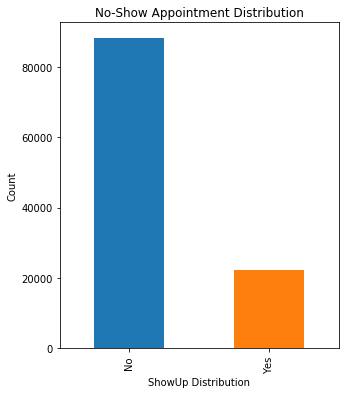

In [52]:
#plotting a barchat to show us the distribution of the No-show appointment column
noshow=df['no_show'].value_counts()
noshow.plot(kind='bar', figsize = (5,6))
plt.title("No-Show Appointment Distribution")
plt.xlabel("ShowUp Distribution")
plt.ylabel("Count");

>The above shows us that we have more people who showed up for an appointment. Now let us look at some factors that determine whether a patient shows up for an appointment or not and to know why some patients did not show up.

### Does Gender determine if a patient shows up for an appointment?

<br> Here we plot avisual that shows us the relationship between the **Gender** and the **No-show Appointment** columns.

In [53]:
#plotting a bar chart to show the relationship between the gender and the no-show apointment
#I used an unstack function here 
gender=df.groupby('Gender')['no_show'].value_counts().unstack()

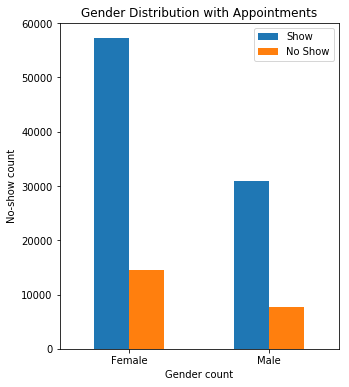

In [54]:
gender.index=['Female', 'Male']
gender.plot(kind='bar', figsize= (5,6))
plt.legend(['Show', 'No Show'])
plt.xticks(rotation=0)
plt.title("Gender Distribution with Appointments")
plt.xlabel("Gender count")
plt.ylabel("No-show count");

>From the above distribution, we can see more females showed up for appointments than the males. In general the females have more count with either showing up or not showing up for appointments.

### Does receiving an SMS determine if a patient shows up for an appointment?

In [55]:
sms=df.groupby('SMS_received')['no_show'].value_counts().unstack()
sms

no_show,No,Yes
SMS_received,,
0,62509,12535
1,25698,9784


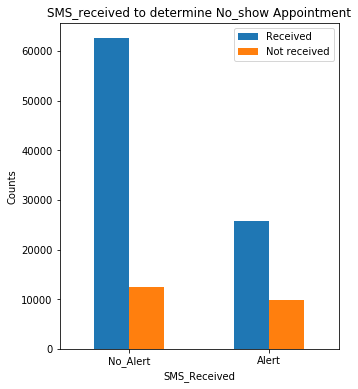

In [56]:
sms.index=['No_Alert', 'Alert']
sms.plot(kind='bar',figsize=(5,6))
plt.legend(['Received', 'Not received'])
plt.xticks(rotation=0)
plt.title("SMS_received to determine No_show Appointment")
plt.xlabel("SMS_Received")
plt.ylabel("Counts");

>People who did not receive an SMS tend to not show up more than those who received. This shows that sending a reminder to the patient does not determine if they would show up.

### Does getting a scholarship determine if a patient shows up for an appointment or vice-versa?

In [57]:
scholarship=df.groupby('Scholarship')['no_show'].value_counts().unstack()
scholarship

no_show,No,Yes
Scholarship,,
0,79924,19741
1,8283,2578


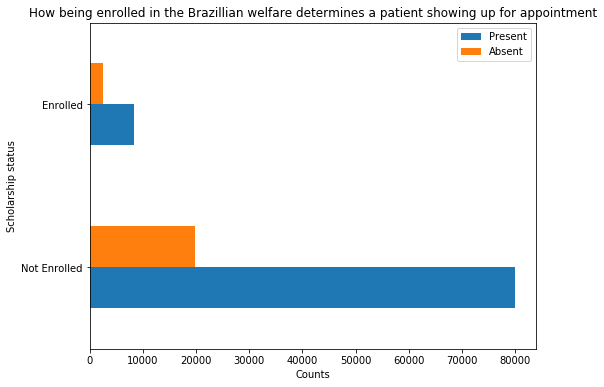

In [58]:
scholarship.index=['Not Enrolled', 'Enrolled']
scholarship.plot(kind='barh', figsize=(8,6))
plt.legend(['Present', 'Absent'])
plt.xticks(rotation=0)
plt.title("How being enrolled in the Brazillian welfare determines a patient showing up for appointment")
plt.xlabel("Counts")
plt.ylabel("Scholarship status");

>Now this is interesting. It seems as though people not in the welfare system showed up more than those in the system. This points to the fact that having a scholarship does not determine if one shows up for an appointment.

### Do Hypertensive patients tend to show up more for appointments?

In [59]:
Hypertensive=df.groupby('Hipertension')['no_show'].value_counts().unstack()
Hypertensive

no_show,No,Yes
Hipertension,,
0,70178,18547
1,18029,3772


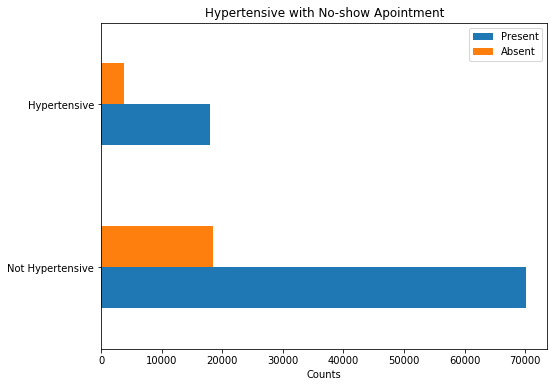

In [60]:
Hypertensive.index=['Not Hypertensive', 'Hypertensive']
Hypertensive.plot(kind='barh', figsize=(8,6))
plt.legend(['Present', 'Absent']);
plt.title("Hypertensive with No-show Apointment")
plt.xlabel("Counts");

>Being an hypertensive patient also does not determine if the patient shows up for an appointment

### Does the scheduled date and appointment date determine when a patient shows up?

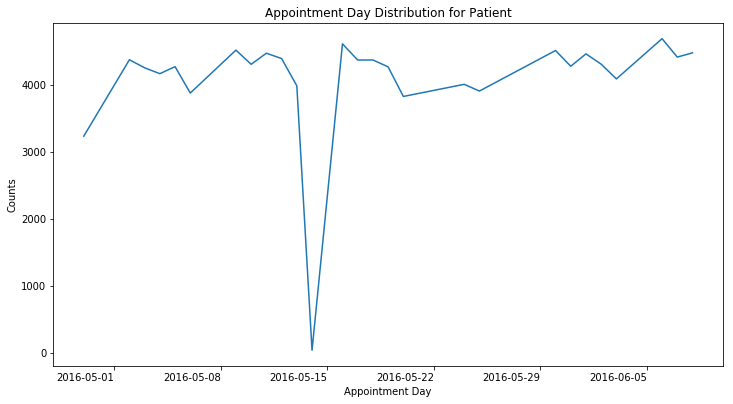

In [61]:
#let us see the AppointmentDay distribution on a line graph
df['AppointmentDay'].value_counts().plot(kind='line', figsize=(12,7))
plt.xticks(rotation=0)
plt.xlabel("Appointment Day")
plt.ylabel("Counts")
plt.title("Appointment Day Distribution for Patient");

In [62]:
#now let us see the relationship of AppointmentDay with the No_show appointment column
df_1=df.groupby('AppointmentDay')['no_show'].value_counts().unstack()

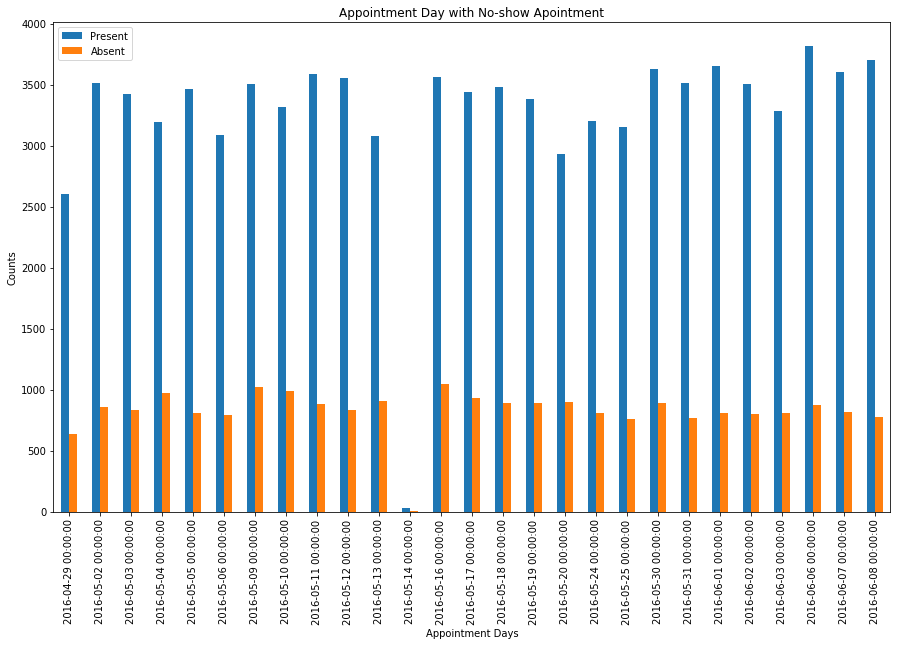

In [63]:
df_1.plot(kind='bar', figsize=(15,9))
plt.legend(['Present', 'Absent'])
plt.title("Appointment Day with No-show Apointment")
plt.ylabel("Counts")
plt.xlabel("Appointment Days");

>Most patients tend to show up on their actual appointment days.

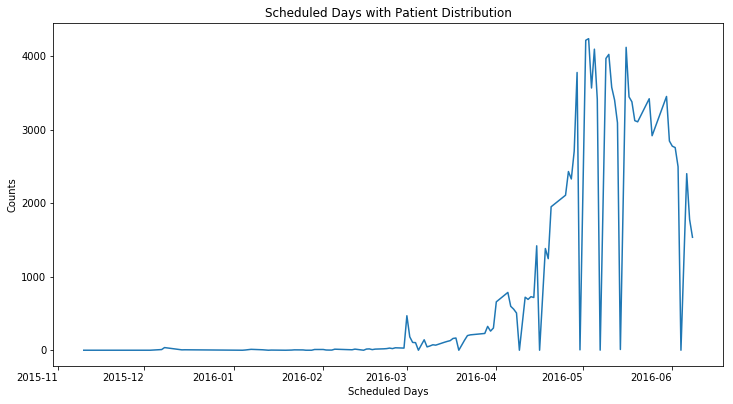

In [64]:
#ScheduledDay distribution
df['ScheduledDay'].value_counts().plot(kind='line', figsize=(12,7))
plt.xticks(rotation=0)
plt.title("Scheduled Days with Patient Distribution")
plt.ylabel("Counts")
plt.xlabel("Scheduled Days");

>This distribution appears to be skewed to the left with month of April to June having more patients calling to schedule appointments than other months.

In [65]:
#now let us see the relationship of AppointmentDay with the No_show appointment column
df_2=df.groupby('ScheduledDay')['no_show'].value_counts().head(20).sort_values(ascending=False).unstack()
df_2

no_show,No,Yes
ScheduledDay,,
2015-12-08,24.0,13.0
2016-01-07,8.0,5.0
2015-12-07,8.0,2.0
2016-01-11,5.0,2.0
2015-12-15,5.0,2.0
2015-12-14,5.0,1.0
2016-01-05,4.0,NaN
2016-01-14,1.0,2.0
2015-12-03,NaN,1.0


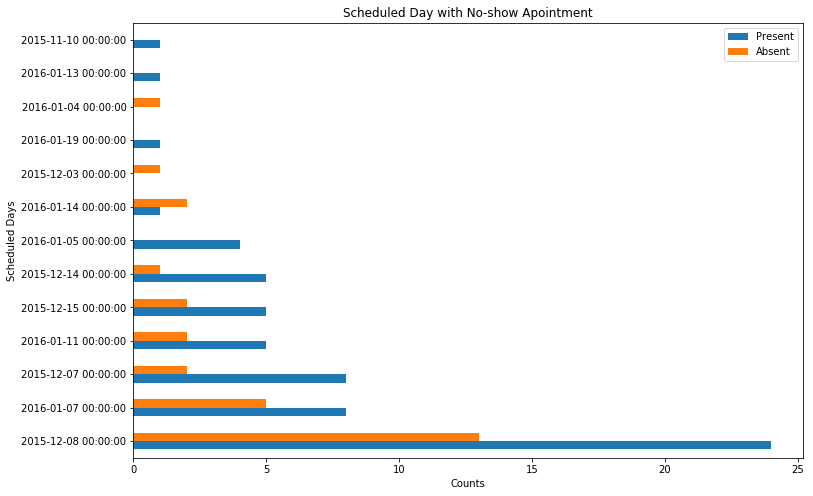

In [66]:
df_2.plot(kind='barh', figsize=(12,8))
plt.legend(['Present', 'Absent'])
plt.title("Scheduled Day with No-show Apointment")
plt.ylabel("Scheduled Days")
plt.xlabel("Counts");

>Most patient who pick a scheduled date tend to show up more.

### Let's look at how the location of the appointment affects patients showing up

In [67]:
#we would look at the distribution of the top 15 neighbourhoods
top15=df['Neighbourhood'].value_counts().head(15)

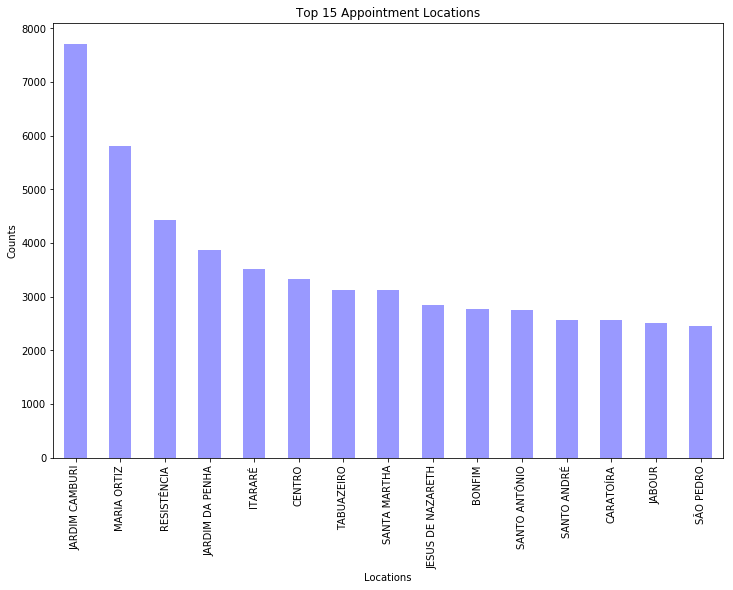

In [68]:
top15.plot(kind='bar', figsize=(12,8), color='blue', alpha=0.4)
plt.title("Top 15 Appointment Locations")
plt.ylabel("Counts")
plt.xlabel("Locations");

>Jardim Camburi has the highest frequency for the appointment centers.

In [69]:
#now let's see the neighbourhood distribution with the no-show appointment
top20=df.groupby('Neighbourhood')['no_show'].value_counts().head(20).sort_values(ascending=False).unstack()

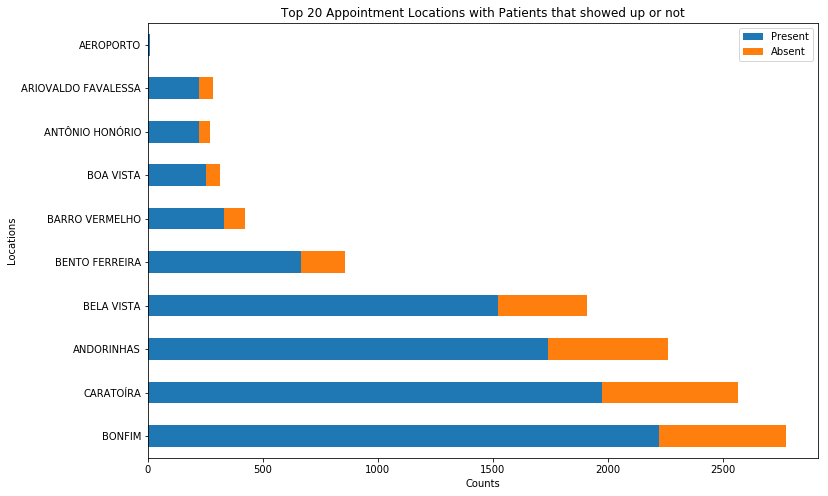

In [70]:
top20.plot(kind='barh', stacked= True, figsize=(12,8))
plt.title("Top 20 Appointment Locations with Patients that showed up or not")
plt.legend(['Present', 'Absent'])
plt.ylabel("Locations")
plt.xlabel("Counts");

>Bonfim has the highest number of patients visiting it's center for appointment. Could this be due to proximity to patient's residence?

<a id='conclusions'></a>
## Conclusions

1. Majority of patients tend to show up for their appointments.
1. Females in general go for check-ups more than males.
1. Sending a reminder SMS to the patient does not guarantee them showing up.
1. Being enrolled into the Brazillian welfare program does not also determine if a patient shows up for an appointment.
1. Hypertensive patients do not show up so much for appointments unlike non-hypertensive ones.
1. Most patients show up on days they have to visit the doctor than days which they called to register the appointment.
1. **Jardim Camburi** center has the highest frequency for locations for doctor's appointment but most patients tend to show up at **Bonfim**. 

### Limitations

1. Not enough details on a type of sickness or factors that could actually prompt a patient to show up for an appointment.
1. I believe not having the patients address also gave a vague analysis. We could have been able to determine why patients showed up more at **Bonfim**, could be due to close proximity to their location?
